<a href="https://colab.research.google.com/github/mondalsnehankur/Numerical-Methods/blob/main/Solving_an_eqn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###***To plot the function  and find the number of real roots.***


> *f(x) = x^3 + 5x - 1*

###***Calculate the roots correct upto 3 significant digits***


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

In [ ]:
# Define the function
def f(x):
  return x**3 + 5*x - 1

***Method 1:*** Using inbuilt funtions.

In [ ]:
# Generate x values for plotting
x = np.linspace(-5, 5, 400)  # Adjust the range as needed

# Calculate corresponding y values
y = f(x)

In [ ]:
# Find the roots using fsolve
initial_guess = [-5,0,5]
roots = fsolve(f, initial_guess) # Provide initial guesses for the roots [list]

# Print the roots with 3 significant digits
print("Roots of the equation:")

roots = set(roots)
#print(roots)

for root in roots:
    print(f"{root:.3f}")

# Determine the number of real roots
num_real_roots = len(set(roots))
print(f"\nNumber of real roots: {num_real_roots}")
print()

'''All the roots are distict but as wel are only considering 3 def=cmal places it seems as if the roots are equal'''
for root in roots:
    print(f"{root}")

Roots of the equation:
0.198
0.198
0.198

Number of real roots: 3

0.19843721453862306
0.19843721453862295
0.19843721453862304


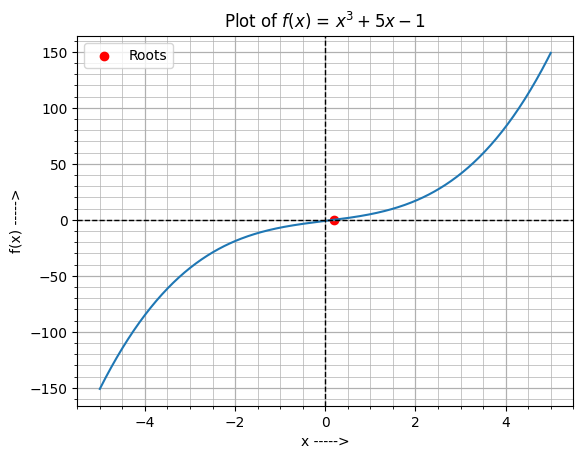

In [ ]:
# Plot the function
plt.plot(x, y)

plt.axhline(0, color='black', linewidth=1, ls='--')
plt.axvline(0, color='black', linewidth=1, ls='--')
plt.xlabel("x ----->")
plt.ylabel("f(x) ----->")
plt.title(r'Plot of $f(x)$ = $x^3 + 5x - 1$', ha='center')
plt.grid(which = 'major', lw = 0.9)
plt.grid(which = 'minor', lw = 0.5)
plt.minorticks_on()

# Plot the roots on the graph
root_a = np.array(list(roots))
plt.scatter(root_a, f(root_a), color='red', label='Roots')
plt.legend()
plt.show()

 ***Method 2:*** Using Newtons-Raphsons Method.

In [ ]:
# along with defining the funtion in itsel we also need to define the 1st derivate of the function

def f_prime(x):
  return 3*x**2 + 5

In [ ]:
def newton_raphson(initial_guess, tolerance, max_iterations):
    x = initial_guess
    for i in range(max_iterations):
        f_x = f(x)
        fprime_x = f_prime(x)

        if fprime_x == 0: #avoid division by 0
          print('Derivative is 0. No solution found.')
          return None

        x_new = x - f_x / fprime_x  #update step

        if abs(x_new - x) < tolerance:  #check for convergence
            return x_new

        x = x_new #update for next iteration

    print('Max iterations reached. No solution found')
    return None

In [ ]:
# Generate x values for plotting
x = np.linspace(-5, 5, 400)  # Adjust the range as needed

# Calculate corresponding y values
y = f(x)

In [ ]:
# Finding roots using initial guesses
initial_guess = [-5,0,5]  # Based on the plot
roots = []

for guess in initial_guess:
    root = newton_raphson(guess, tolerance=1e-6, max_iterations=100)
    if root is not None:
        roots.append(round(root,3))  # Round to 3 significant digits

# Filter unique roots
unique_roots = list(set(roots))

# Print the roots with 3 significant digits
print("Roots of the equation:")
for root in unique_roots:
    print(f"{root:.3f}")

print("Number of roots found:", len(unique_roots))

Roots of the equation:
0.198
Number of roots found: 1


***Method 3:*** Using Bisection Method.

The bisection method is numerical method of finding roots of a continuous funtion. It works by repeatedly narrowing down an interval that contains a root.

In [ ]:
# Bisection Method

def bisection_method(a, b, tolerance, max_iteration):
    if f(a) * f(b) > 0:
      '''print('Bisection methos fails. f(a) & f(b) must have opposite signs.')'''
      return None
    for i in range(max_iteration):
        midpoint = (a + b) / 2
        if abs(f(midpoint)) < tolerance:  # Checking if 'midpoint' is a root
            return midpoint
        elif f(a) * f(midpoint) < 0:   # Root is in the left half
            b = midpoint
        else:   # Root is in the right half
            a = midpoint
    print('Maximum iterations reached. No solutions found.')
    return midpoint

In [ ]:
# We need to find the intervals where the function changes sign

intervals = [(-5,-4),(-4,-3),(-3,-2),(-2,-1),(-1,0),(0,1),(1,2),(2,3),(3,4),(4,5)]

roots = []

for a,b in intervals:
  root = bisection_method(a,b,tolerance=1e-6, max_iteration=100)
  if root is not None:
    roots.append(round(root,3))

unique_roots = list(set(roots))

print('The real roots of the function f(x) is :')
for root in unique_roots:
  print(f'{root:.3f}')

print('\n The number of real roots :',len(unique_roots))

The real roots of the function f(x) is :
0.198

 The number of real roots : 1


Difference between ***Lists*** and ***Array***
1. ***Lists:***
    >Can store elements of different data type
    >Dynamic, can grow or shrink as neede
    >Less memory efficient due to stroing elements of different datatype

2. ***Array:***
    >Can store elements of a single datatype
    >Size is fixed after initialization
    >Memory efficient as stores only single type of data.